In [58]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

In [3]:
df = pd.read_csv('german_credit_data.csv')

In [6]:
df = df.iloc[:,1:]

In [7]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


<Axes: xlabel='Risk'>

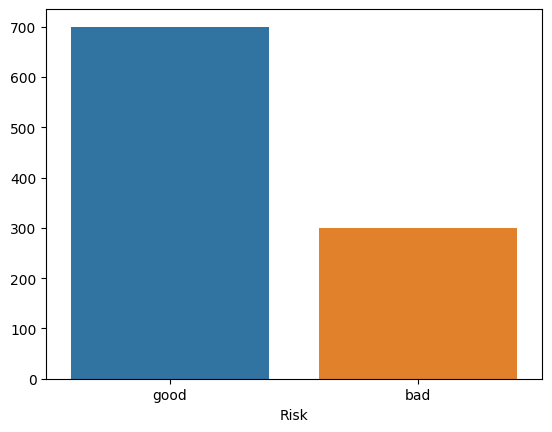

In [11]:
sns.barplot(x = df.Risk.value_counts().index, y = df.Risk.value_counts().values)

<Axes: xlabel='Risk', ylabel='Age'>

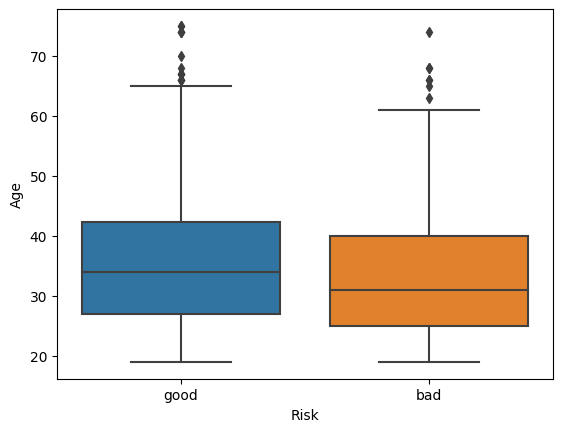

In [12]:
sns.boxplot(x = 'Risk', y = 'Age', data = df)

<Axes: xlabel='Sex', ylabel='count'>

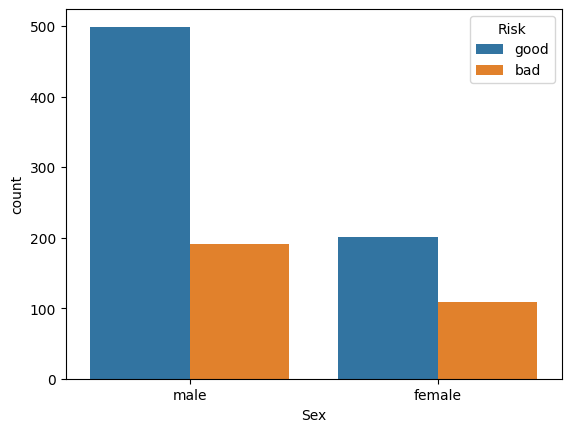

In [13]:
sns.countplot(x = 'Sex', hue = 'Risk', data = df)

<Axes: xlabel='Job', ylabel='count'>

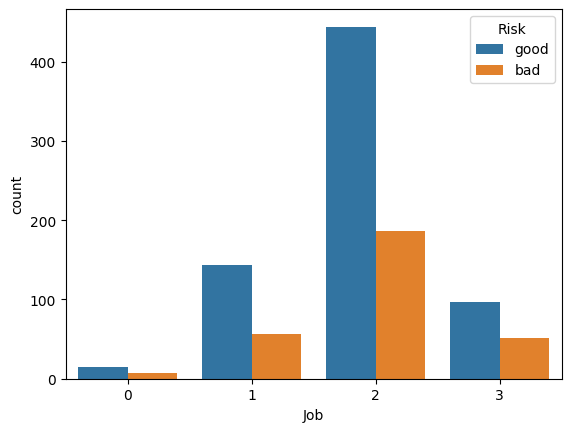

In [15]:
# numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled
sns.countplot(x = 'Job', hue = 'Risk', data = df)

<Axes: xlabel='Housing', ylabel='count'>

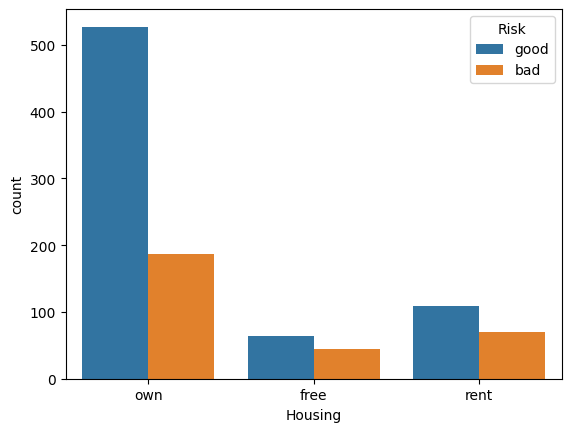

In [17]:
sns.countplot(x = 'Housing', hue = 'Risk', data = df)

<Axes: xlabel='Saving accounts', ylabel='count'>

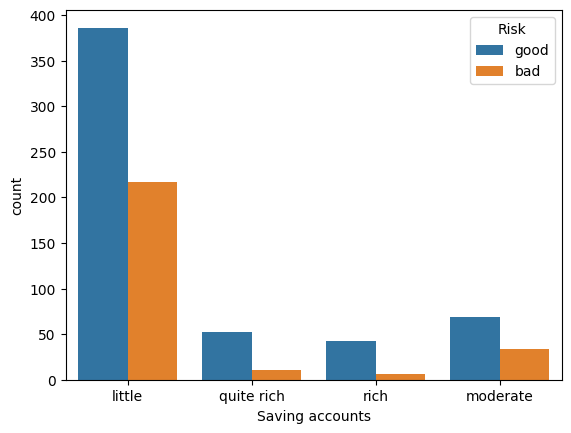

In [18]:
sns.countplot(x = 'Saving accounts', hue = 'Risk', data = df)

In [19]:
df['Checking account'].isna().sum()

394

<Axes: xlabel='Checking account', ylabel='count'>

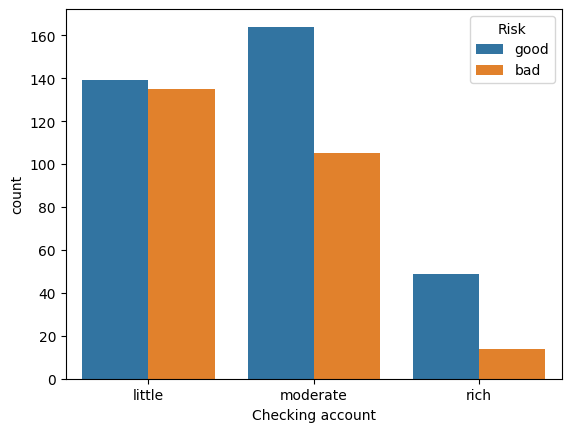

In [20]:
sns.countplot(x = 'Checking account', hue = 'Risk', data = df)

<Axes: xlabel='Risk', ylabel='Credit amount'>

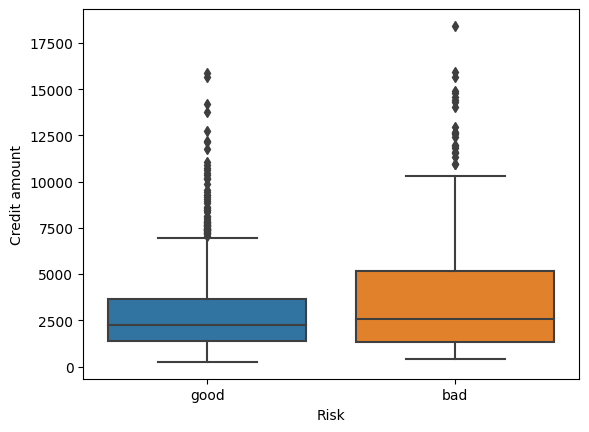

In [21]:
sns.boxplot(x = 'Risk', y = 'Credit amount', data = df)

<Axes: xlabel='Risk', ylabel='Duration'>

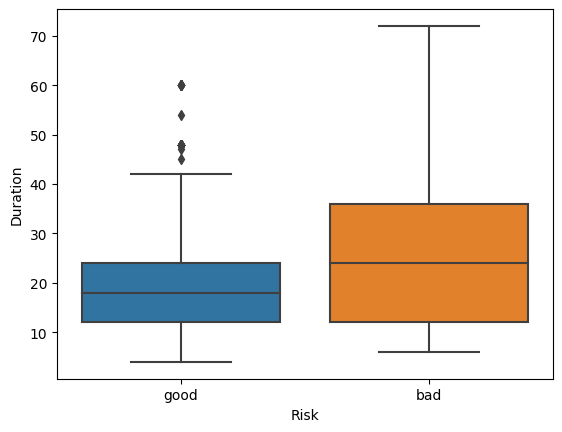

In [22]:
sns.boxplot(x = 'Risk', y = 'Duration', data = df)

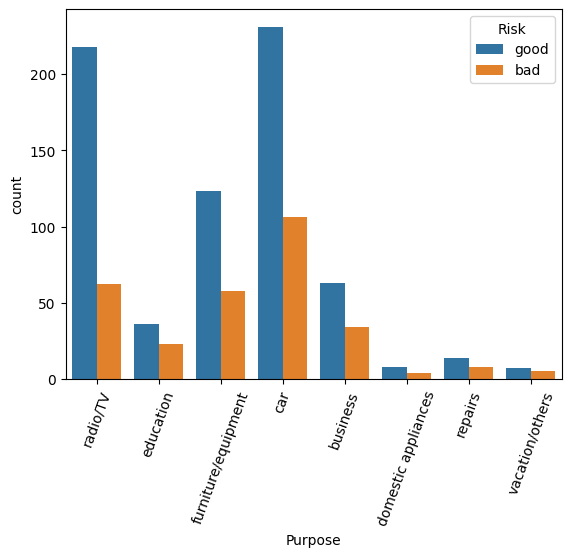

In [30]:
g = sns.countplot(x = 'Purpose', hue = 'Risk', data = df)
g.set_xticklabels(g.get_xticklabels(), rotation=70)
plt.show()

In [31]:
def find_nan_values(df):
    if df.isnull().values.any():
        null_columns=df.columns[df.isnull().any()].tolist()
        for column in null_columns:
            total_values=df.shape[0]
            null_values=df[column].isnull().sum()
            print("No. of Nan Values in '{}' column --> {}".format(column,null_values))
            print("{:.2f} % of Total values".format((100 * null_values) / total_values))
            print("\n")
    else:
        print("No Column has Nan Values")

In [32]:
find_nan_values(df)

No. of Nan Values in 'Saving accounts' column --> 183
18.30 % of Total values


No. of Nan Values in 'Checking account' column --> 394
39.40 % of Total values




In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [94]:
from sklearn.preprocessing import LabelEncoder

df_new = df.copy()

house_map = {"free": 0, "rent": 1, "own": 2}
df_new['Housing'] = df['Housing'].map(house_map)

saving_map = {'little':0, 'moderate':1, 'quite rich':2, 'rich':3}
df_new['Saving accounts'] = df['Saving accounts'].map(saving_map)

checking_map = {'little':0, 'moderate':1, 'rich':2}
df_new['Checking account'] = df['Checking account'].map(checking_map)

for column in ['Sex','Purpose','Risk']:
    encoder = LabelEncoder()
    df_new[column] = encoder.fit_transform(df_new[column].values)

In [95]:
df_new.corr()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
Age,1.000000,0.161694,0.015673,-0.112051,0.037330,0.008451,0.032716,-0.036136,-0.074084,0.091127
Sex,0.161694,1.000000,0.070298,0.033818,-0.005562,0.002425,0.093482,0.081432,-0.063231,0.075493
Job,0.015673,0.070298,1.000000,-0.101939,-0.031768,-0.022126,0.285385,0.210910,-0.025326,-0.032735
Housing,-0.112051,0.033818,-0.101939,1.000000,0.035097,0.084878,-0.171585,-0.137434,0.086839,0.127789
Saving accounts,0.037330,-0.005562,-0.031768,0.035097,1.000000,0.159763,-0.063939,-0.031947,-0.038322,0.145097
Checking account,0.008451,0.002425,-0.022126,0.084878,0.159763,1.000000,-0.019838,-0.042768,0.032975,0.165131
Credit amount,0.032716,0.093482,0.285385,-0.171585,-0.063939,-0.019838,1.000000,0.624984,-0.151720,-0.154739
Duration,-0.036136,0.081432,0.210910,-0.137434,-0.031947,-0.042768,0.624984,1.000000,-0.083459,-0.214927
Purpose,-0.074084,-0.063231,-0.025326,0.086839,-0.038322,0.032975,-0.151720,-0.083459,1.000000,0.061145
Risk,0.091127,0.075493,-0.032735,0.127789,0.145097,0.165131,-0.154739,-0.214927,0.061145,1.000000


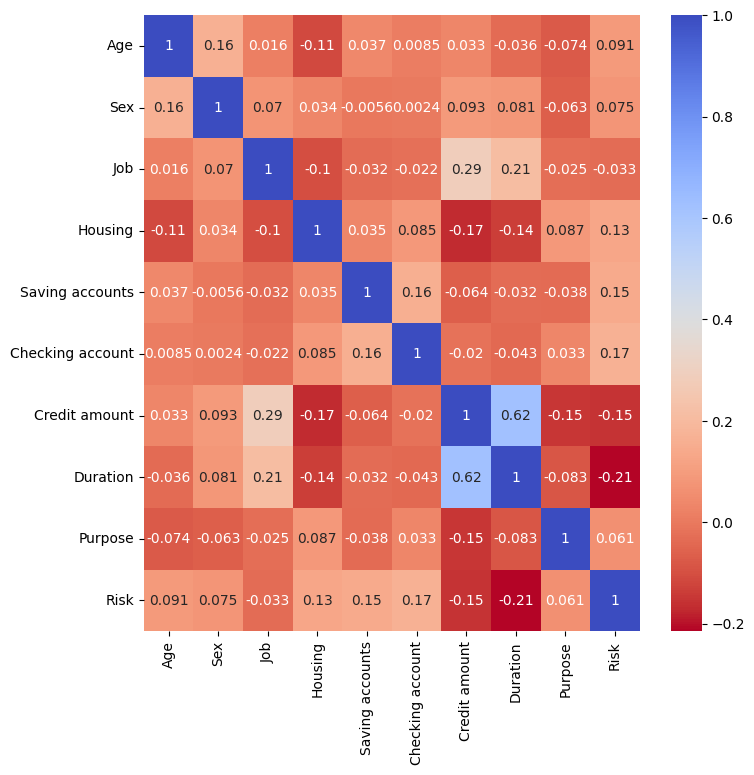

In [96]:
plt.figure(figsize = (8,8))
sns.heatmap(df_new.corr(), annot=True,cmap='coolwarm_r')
plt.show()

In [97]:
df_new['Saving accounts']

0      NaN
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
995    0.0
996    0.0
997    0.0
998    0.0
999    1.0
Name: Saving accounts, Length: 1000, dtype: float64

<Axes: >

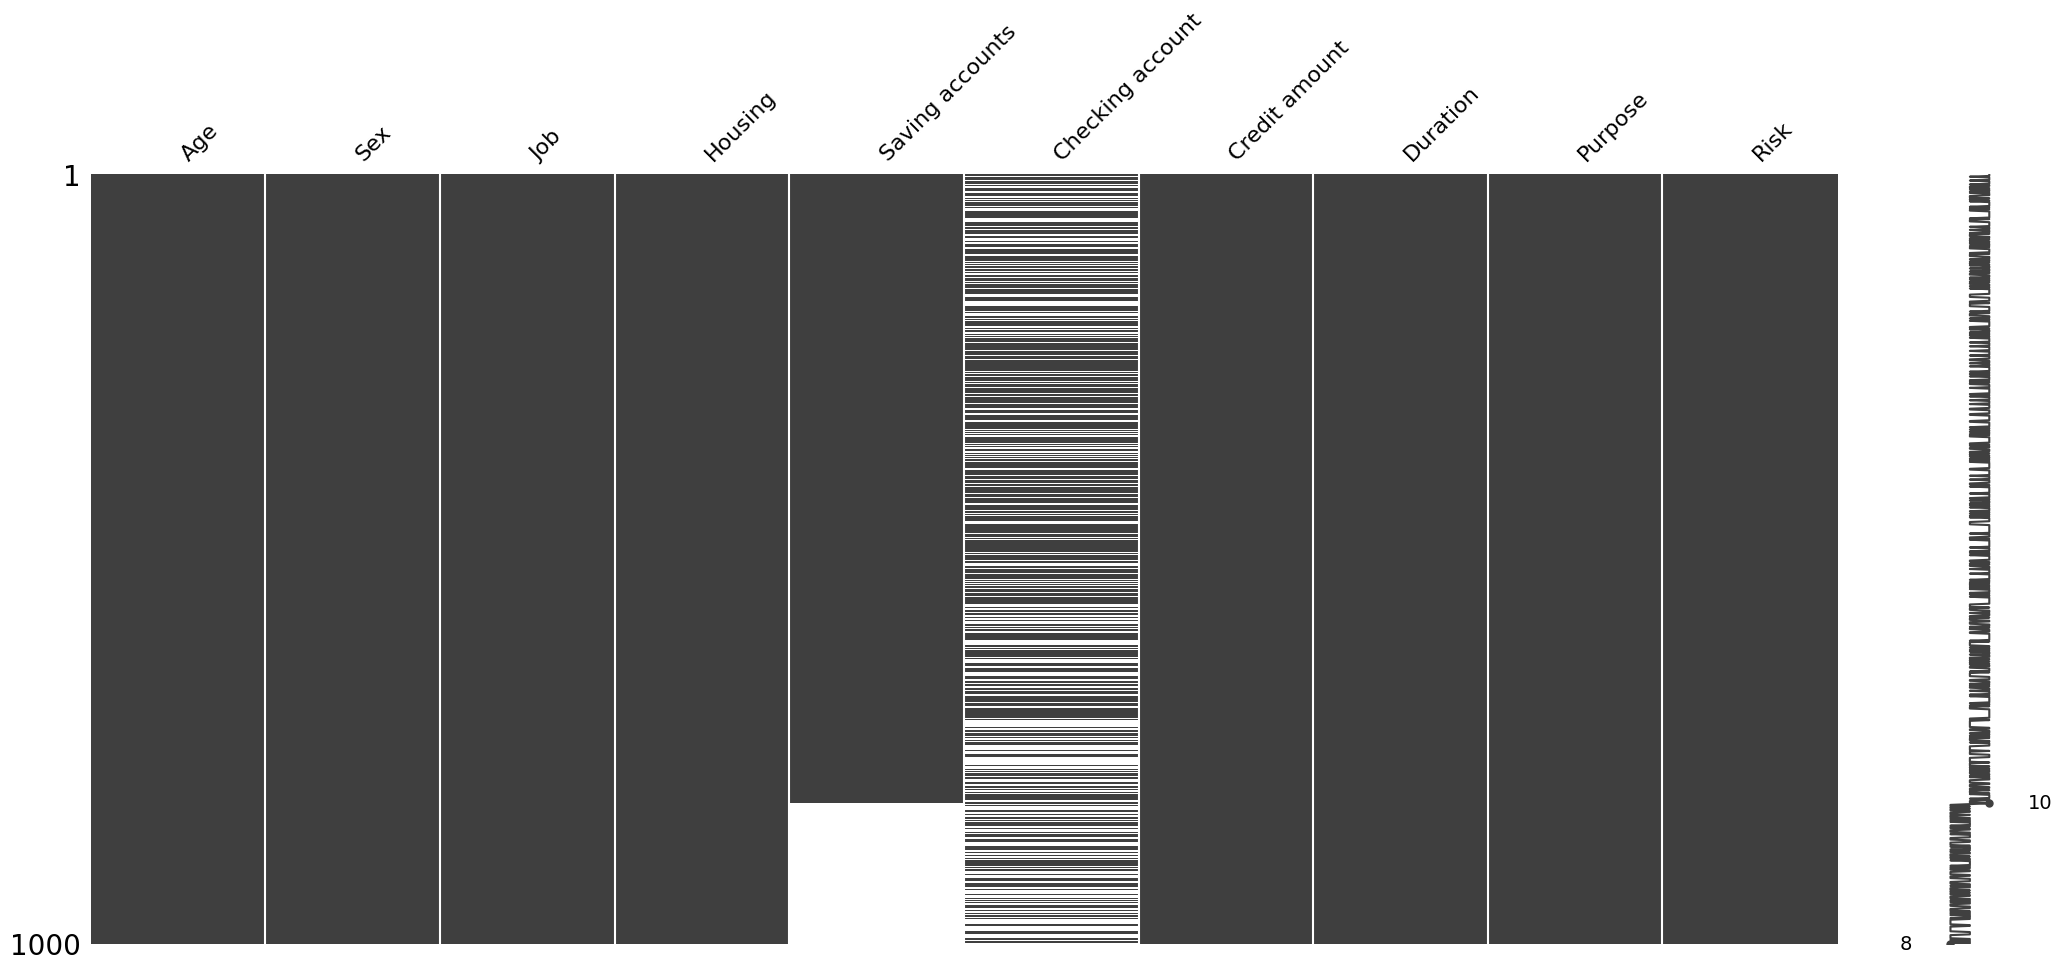

In [98]:
msno.matrix(df.sort_values('Saving accounts'))

In [100]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5, weights="uniform")
df_new['Saving accounts'] = knn_imputer.fit_transform(df_new[['Saving accounts']])
df_new['Checking account'] = knn_imputer.fit_transform(df_new[['Checking account']])

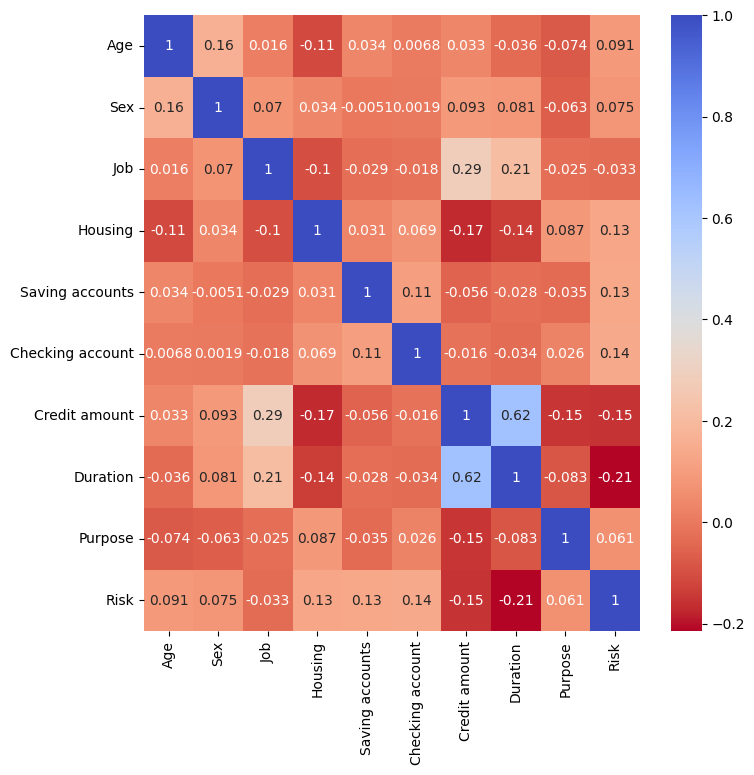

In [103]:
plt.figure(figsize = (8,8))
sns.heatmap(df_new.corr(), annot=True,cmap='coolwarm_r')
plt.show()

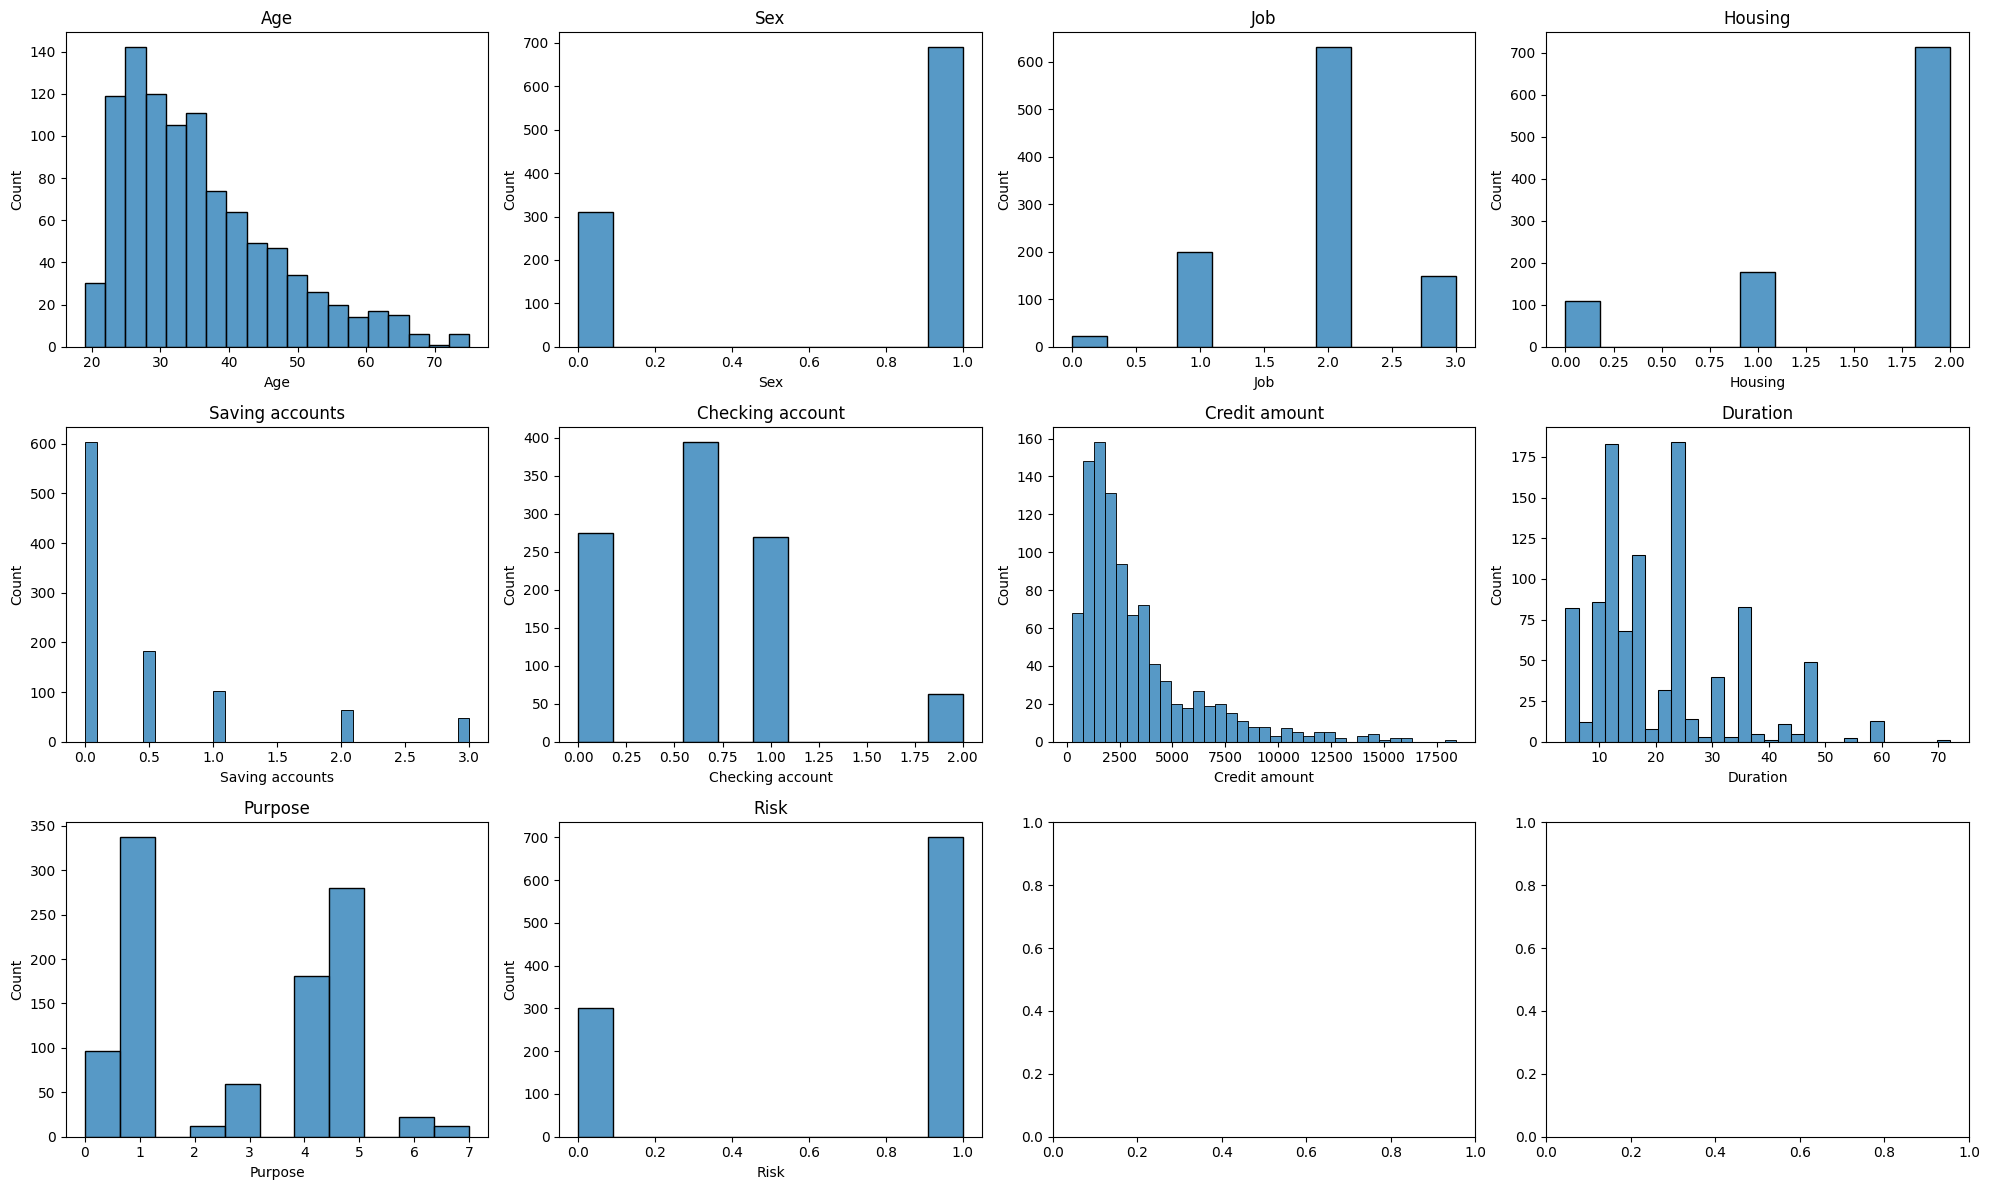

In [106]:
f, axes = plt.subplots(nrows = 3, ncols=4, figsize=(20,12))

axess = axes.flatten()

for i in range(len(df_new.columns)):
    sns.histplot(df_new[df_new.columns[i]], ax=axess[i])
    axess[i].set_title(df_new.columns[i])
    
plt.tight_layout()
plt.show()

In [110]:
df_new['Age'] = np.log(df_new['Age'])
df_new['Credit amount'] = np.log(df_new['Credit amount'])

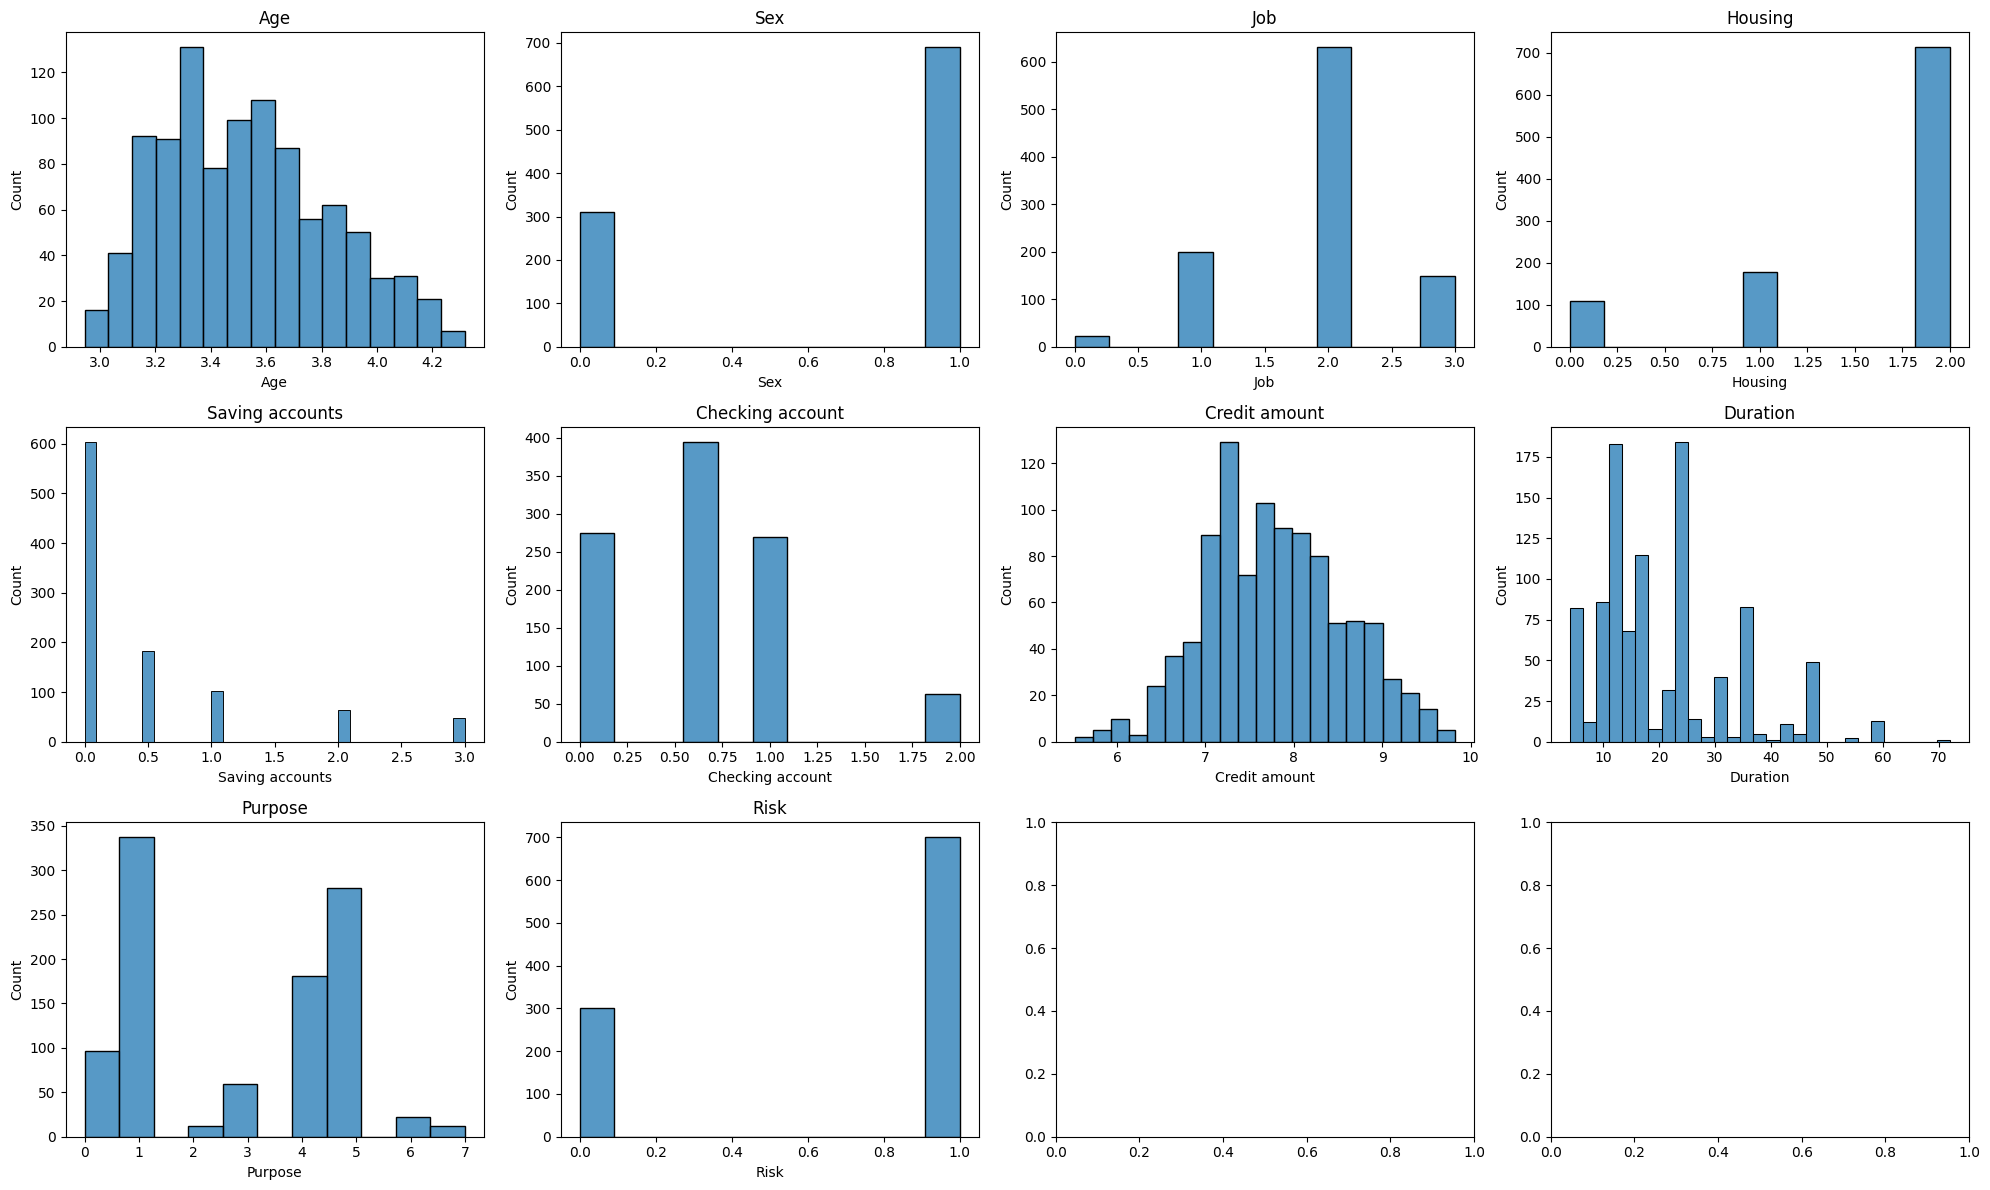

In [111]:
f, axes = plt.subplots(nrows = 3, ncols=4, figsize=(20,12))

axess = axes.flatten()

for i in range(len(df_new.columns)):
    sns.histplot(df_new[df_new.columns[i]], ax=axess[i])
    axess[i].set_title(df_new.columns[i])
    
plt.tight_layout()
plt.show()

In [235]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [262]:
dummies = ['Sex', 'Purpose', 'Housing', 'Saving accounts', 
           'Checking account','Risk']
df_new = pd.get_dummies(df, columns=dummies, drop_first=True)

In [239]:
for column in ['Risk']:
    encoder = LabelEncoder()
    df_new[column] = encoder.fit_transform(df_new[column].values)

In [264]:
from sklearn.model_selection import train_test_split

X = df_new.drop('Risk_good',axis=1)
y = df_new['Risk_good']

In [265]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.3)

In [266]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

In [267]:
std_scaler.fit(X_train)
X_test = std_scaler.transform(X_test)

In [268]:
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc
)



classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "XGBoostClassifier": XGBClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
}

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)


for key, classifier in classifiers.items():
    classifier = make_pipeline(preprocessing.StandardScaler(), classifier)
    training_score = cross_val_score(classifier, X_train, y_train, cv=cv, scoring='accuracy')
    print("Classifiers: ", key, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisiticRegression Has a training score of 67.0 % accuracy score
Classifiers:  KNearest Has a training score of 63.0 % accuracy score
Classifiers:  Support Vector Classifier Has a training score of 67.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 59.0 % accuracy score
Classifiers:  XGBoostClassifier Has a training score of 63.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 67.0 % accuracy score


In [300]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pandas as pd

def perform_grid_search(classifier, param_grid, X_train, y_train):
    """
    Perform grid search with cross-validation.

    :param classifier: The classifier to be tuned
    :param param_grid: The grid of parameters to search over
    :param X_train: Training data features
    :param y_train: Training data labels
    :return: Best parameters and scores
    """
    # Define scoring metrics
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score),
        'recall': make_scorer(recall_score),
        'f1': make_scorer(f1_score)
    }

    # Create k-fold cross-validation strategy
    kfold = KFold(n_splits=5, shuffle=True, random_state=0)

    # Create GridSearchCV instance
    grid_search = GridSearchCV(classifier, param_grid, scoring=scoring, cv=kfold, refit='recall')

    # Create pipeline
    pipeline = make_pipeline(StandardScaler(), grid_search)

    # Train the model
    pipeline.fit(X_train, y_train)

    # Get the best parameters
    best_params = grid_search.best_params_
    
    # Get the best es ti
    best_estimator = grid_search.best_estimator_

    # Get cross-validation results
    cv_results = grid_search.cv_results_

    # Extract performance metrics for the best parameter combination
    best_scores = {
        'best_f1_score': np.mean(cv_results['mean_test_f1']),
        'best_accuracy': np.mean(cv_results['mean_test_accuracy']),
        'best_precision': np.mean(cv_results['mean_test_precision']),
        'best_recall': np.mean(cv_results['mean_test_recall'])
    }

    return best_params, best_estimator, best_scores

# Parameters grids for different classifiers
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
knears_params = {"n_neighbors": list(range(2,7,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(1,10,1)), 
               "min_samples_leaf": list(range(2,7,1))}

xgb_grid = {
    'n_estimators': [50,100,150],  # Number of trees
    'learning_rate': [0.01, 0.1,0.5],  # Step size shrinkage
    'max_depth': list(range(1,10,3)),  # Depth of tree
    'gamma': [0.2,0.5,0.8],  # Minimum loss reduction
    'subsample': [0.5,1.0],  # Subsample ratio of training instances
    'colsample_bytree': [0.5,1.0],  # Subsample ratio of columns
}

xgb_grid  = {
 'max_depth':[3,5,6,10],
 'min_child_weight':[3,5,10],
 'gamma':[0.0, 0.1, 0.2, 0.3, 0.4],
# 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 10],
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}

rf_grid = {
    'n_estimators': [10, 20, 30, 50],
    'max_depth': list(range(1,10,3)),
    'max_features' : range(5,10)
}

# Classifiers and their parameter grids
classifiers = {
    "LogisticRegression": (LogisticRegression(), log_reg_params),
    "KNearest": (KNeighborsClassifier(), knears_params),
    "Support Vector Classifier": (SVC(), svc_params),
    "DecisionTreeClassifier": (DecisionTreeClassifier(), tree_params),
    "XGBoostClassifier": (XGBClassifier(), xgb_grid),
    "RandomForestClassifier": (RandomForestClassifier(), rf_grid),
}

# Table to store results
results_table = []

# Evaluate each classifier
for name, (classifier, params) in classifiers.items():
    best_params, best_estimator,  best_scores = perform_grid_search(classifier, params, X_train, y_train)
    results_table.append(pd.Series([name, best_params, best_estimator, best_scores['best_accuracy'],
                                                    best_scores['best_precision'], best_scores['best_recall'], 
                                                    best_scores['best_f1_score']],
                                                   index=['Classifier', 'Best Parameters', 'Best Estimator', 'Accuracy', 
                                                          'Precision', 'Recall', 'F1 Score']))



In [301]:
results_table = pd.DataFrame(results_table)

In [302]:
results_table

,Classifier,Best Parameters,Best Estimator,Accuracy,Precision,Recall,F1 Score
0,LogisticRegression,"{'C': 0.001, 'penalty': 'l2'}",LogisticRegression(C=0.001),NaN,NaN,NaN,NaN
1,KNearest,"{'algorithm': 'auto', 'n_neighbors': 5}",KNeighborsClassifier(),0.582857,0.694872,0.706681,0.694025
2,Support Vector Classifier,"{'C': 0.5, 'kernel': 'rbf'}",SVC(C=0.5),0.669732,0.686726,0.961638,0.799885
3,DecisionTreeClassifier,"{'criterion': 'entropy', 'max_depth': 1, 'min_...","DecisionTreeClassifier(criterion='entropy', ma...",0.657016,0.706328,0.863919,0.774117
4,XGBoostClassifier,"{'colsample_bytree': 0.85, 'gamma': 0.3, 'max_...","XGBClassifier(base_score=None, booster=None, c...",0.649048,0.719049,0.812096,0.760479
5,RandomForestClassifier,"{'max_depth': 1, 'max_features': 5, 'n_estimat...","(DecisionTreeClassifier(max_depth=1, max_featu...",0.685238,0.697471,0.962000,0.807319


In [303]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

In [304]:
X_train_transform = std_scaler.fit_transform(X_train)

<module 'matplotlib.pyplot' from '/Users/eliottjiang/miniforge3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

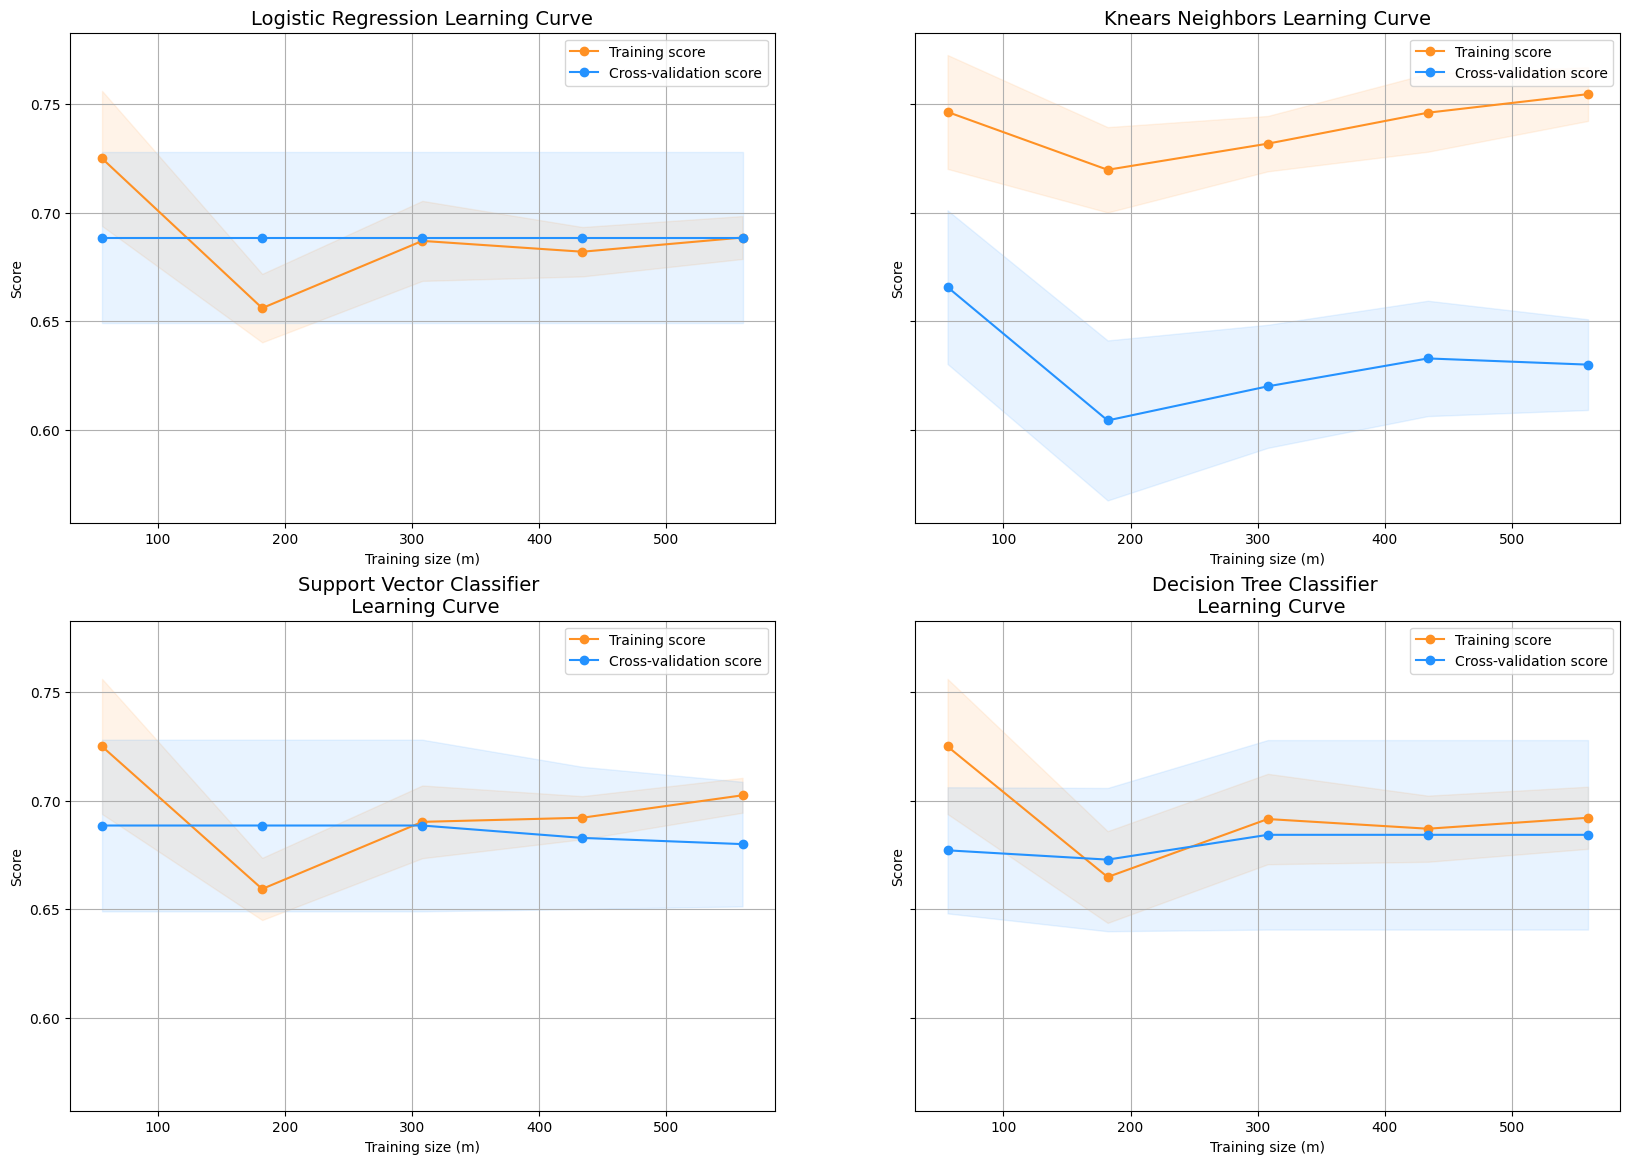

In [305]:
plot_learning_curve(results_table.iloc[0][2], results_table.iloc[1][2], results_table.iloc[2][2], results_table.iloc[3][2], X_train_transform, y_train,cv =  KFold(n_splits=5, shuffle=True, random_state=0))

In [306]:
log_reg_pred = results_table.iloc[0][2].predict(X_train_transform)
knears_pred = results_table.iloc[1][2].predict(X_train_transform)
svc_pred = results_table.iloc[2][2].predict(X_train_transform)
tree_pred = results_table.iloc[3][2].predict(X_train_transform)
xgb_pred = results_table.iloc[4][2].predict(X_train_transform)
rf_pred = results_table.iloc[5][2].predict(X_train_transform)

In [307]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))
print('XGBoost Classifier: ', roc_auc_score(y_train, xgb_pred))
print('Random Forest Classifier: ', roc_auc_score(y_train, rf_pred))

Logistic Regression:  0.5
KNears Neighbors:  0.656353496516807
Support Vector Classifier:  0.5137614678899083
Decision Tree Classifier:  0.5
XGBoost Classifier:  0.699931478168183
Random Forest Classifier:  0.5


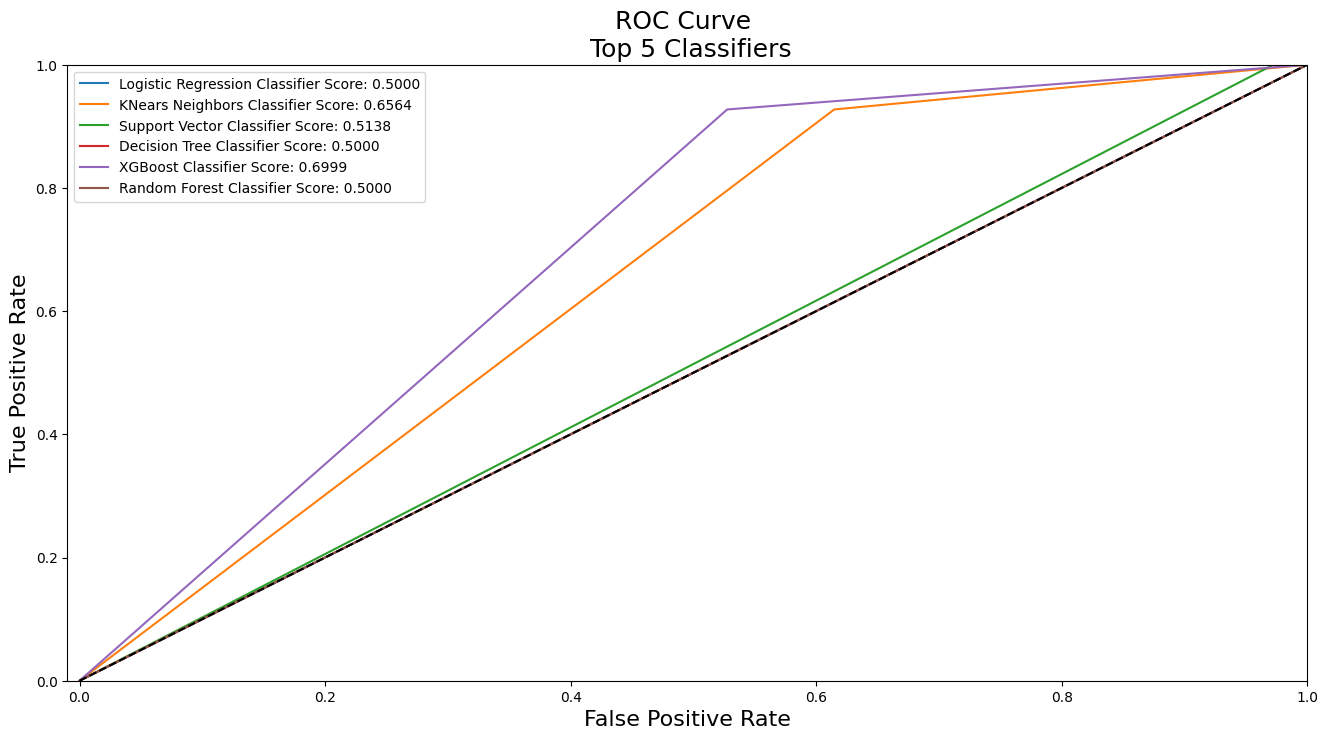

In [308]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)
xgb_fpr, xgb_tpr, xgb_threshold = roc_curve(y_train, xgb_pred)
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_train, rf_pred)



def graph_roc_curve_multiple():
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 5 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot(xgb_fpr, xgb_tpr, label='XGBoost Classifier Score: {:.4f}'.format(roc_auc_score(y_train, xgb_pred)))
    plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_train, rf_pred)))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend()
    
graph_roc_curve_multiple()
plt.show()

In [284]:
rf = RandomForestClassifier(max_depth=None, max_features=10, n_estimators=15, random_state=2)

#trainning with the best params
rf.fit(X_train_transform, y_train)

RandomForestClassifier(max_features=10, n_estimators=15, random_state=2)

In [321]:
rf_pred_test = results_table.iloc[4][2].predict(X_test)
# rf_pred_test = rf.predict(X_test)


Average precision-recall score: 0.77


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.77')

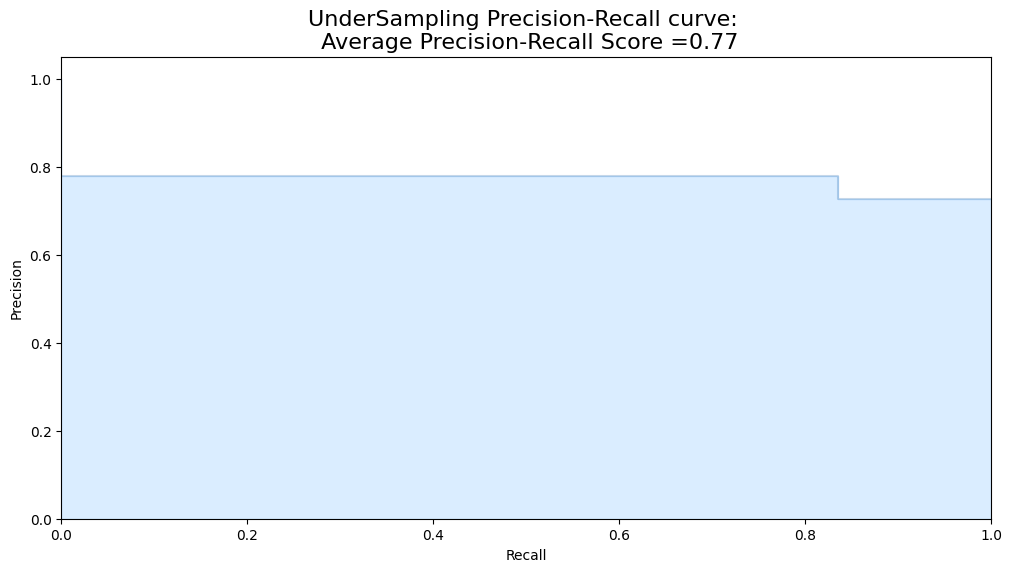

In [322]:
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, rf_pred_test)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(y_test, rf_pred_test)

plt.step(recall, precision, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

In [323]:
from sklearn.metrics import classification_report


print(classification_report(y_test, rf_pred_test))

              precision    recall  f1-score   support

       False       0.45      0.37      0.41        82
        True       0.78      0.83      0.81       218

    accuracy                           0.71       300
   macro avg       0.62      0.60      0.61       300
weighted avg       0.69      0.71      0.70       300



Accuracy: 0.7066666666666667
Precision: 0.7777777777777778
Recall: 0.8348623853211009
F1 Score: 0.8053097345132744
Confusion Matrix:
 [[ 30  52]
 [ 36 182]]
ROC AUC Score: 0.6003580219288431


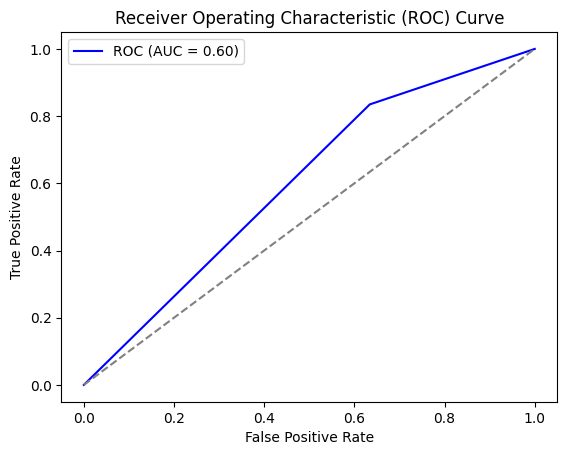

In [324]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 计算各种性能指标
accuracy = accuracy_score(y_test, rf_pred_test)
precision = precision_score(y_test, rf_pred_test)
recall = recall_score(y_test, rf_pred_test)
f1 = f1_score(y_test, rf_pred_test)
conf_matrix = confusion_matrix(y_test, rf_pred_test)
roc_auc = roc_auc_score(y_test, rf_pred_test)

# 打印性能指标
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n {conf_matrix}")
print(f"ROC AUC Score: {roc_auc}")

# 绘制 ROC 曲线
fpr, tpr, thresholds = roc_curve(y_test, rf_pred_test)
plt.plot(fpr, tpr, color='blue', label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


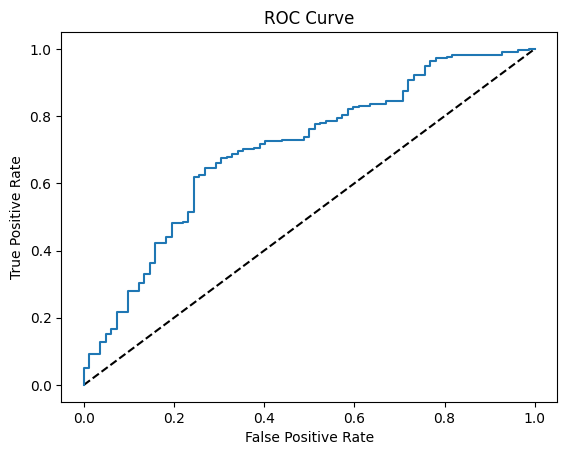

In [329]:
y_pred_prob = results_table.iloc[4][2].predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [283]:
y_test

35     False
767     True
156     True
6       True
208     True
       ...  
39      True
239     True
74     False
993     True
205     True
Name: Risk_good, Length: 300, dtype: bool

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()

# Fitting with train data
model = GNB.fit(X_train, y_train)

In [ ]:
features = []
features.append(('pca', PCA(n_components=2)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)
# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', GaussianNB()))
model = Pipeline(estimators)
# evaluate pipeline
seed = 7
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())